<a href="https://colab.research.google.com/github/NattachaiWat/ml442/blob/superaiengineer/namecard_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%%bash
sudo apt-get update
sudo apt-get install libleptonica-dev 
sudo apt-get install tesseract-ocr tesseract-ocr-dev
sudo apt-get install libtesseract-dev
sudo apt-get install tesseract-ocr-tha # Install Thai lang
sudo apt-get install tesseract-ocr-chi-sim # Install Chinese lang
sudo apt install tesseract-ocr
pip install detecto==1.1.4
pip install pytesseract


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
libleptonica-dev is a

E: Package 'tesseract-ocr-dev' has no installation candidate
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




In [12]:
%%bash
tesseract --list-langs

List of available languages (4):
eng
osd
tha
chi_sim


In [24]:
%%bash
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_01.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_02.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_03.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_04.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_05.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_06.jpg
wget -q https://storage.googleapis.com/nattachai-ai-data/share/ztrus/models/namecard/images/testing_07.jpg


In [14]:
import os
import torch
from detecto.core import Model
from detecto import utils, visualize
from torchvision import transforms
from detecto.visualize import plot_prediction_grid
import cv2
import pytesseract
import re
try:
    from PIL import Image
except ImportError:
    import Image
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [45]:
custom_config = r'--oem 3 --psm 6 -c preserve_interword_spaces=1'
model_name = 'model_weights.pth'
params_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225]),
                                        transforms.Resize(256)
                                        ])

labels = ["name","email","telephone_number","company"]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model(labels,device)
model._model.load_state_dict(torch.load(model_name, map_location=model._device))

<All keys matched successfully>

In [42]:
test_filename='testing_06.jpg'
image = utils.read_image(test_filename)  # Helper function to read in images
transformed_image = params_transforms(image)
 

predictions = model.predict_top(transformed_image)  # Same as above, but returns only the top predictions

labels, boxes, scores = predictions

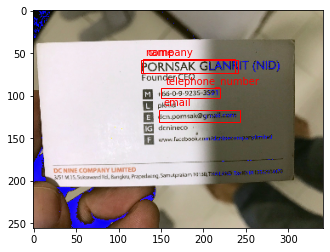

In [43]:
visualize.show_labeled_image(transformed_image, boxes, labels)

In [44]:
img = cv2.imread(test_filename)

img_width,img_height = img.shape[0],img.shape[1]
resize_width,resize_height = transformed_image.shape[1],transformed_image.shape[2]

ratio_w = float(img_width)/float(resize_width)
ratio_h = float(img_height)/float(resize_height)

for box,label in zip(boxes.numpy(),labels):
  x1,y1,x2,y2 = [int(i) for i in box]
  x1 = int(x1*ratio_h)
  x2 = int(x2*ratio_h)
  y1 = int(y1*ratio_w)
  y2 = int(y2*ratio_w)

  # Cropping Image     
  cropped_img = img[y1:y2,x1:x2,::-1]
  crop_pil = Image.fromarray(cropped_img)

  # Calling OCR
  ocr = pytesseract.image_to_string(cropped_img,lang='tha+eng+chi_sim',
                                    config=custom_config
                                    )
  # clean \n data
  ocr = ocr = ocr.replace('\n','')
  print(label,':',ocr.replace('\n',''))

email : dcn.pornsak@g
telephone_number : 66-0-9-9235-359
company : ว๐เภงรผม6 6เค
name : PORNSAK GUANR
